In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#import dataset MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalisasi data (0-255 -> 0-1) dan reshape agar sesuai dengan input LeNet-5 (32x32x1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Tambahkan padding 2 pixel di tiap sisi agar ukuran gambar menjadi 32x32
x_train = tf.image.resize_with_pad(x_train[..., tf.newaxis], 32, 32)
x_test = tf.image.resize_with_pad(x_test[..., tf.newaxis], 32, 32)





In [16]:
# Model LeNet-5
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1)),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')  # 10 kelas (0-9)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8436 - loss: 0.5148 - val_accuracy: 0.9620 - val_loss: 0.1200
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.9644 - loss: 0.1155 - val_accuracy: 0.9751 - val_loss: 0.0777
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.9793 - loss: 0.0693 - val_accuracy: 0.9777 - val_loss: 0.0682
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9835 - loss: 0.0510 - val_accuracy: 0.9831 - val_loss: 0.0544
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9846 - val_loss: 0.0477
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.9823 - val_loss: 0.0563
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9822 - val_loss: 0.0546
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.9926 - loss: 0.0221 - 

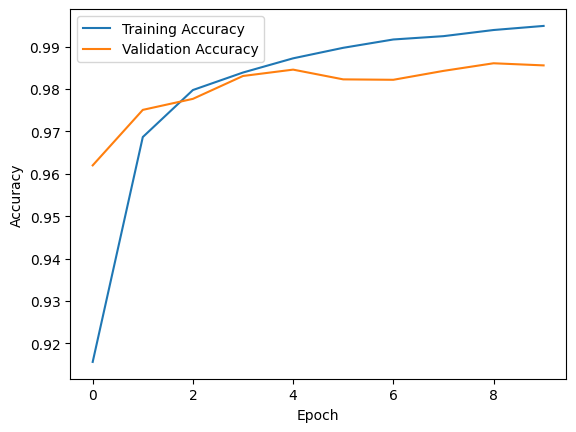

In [18]:
# Plot akurasi training dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


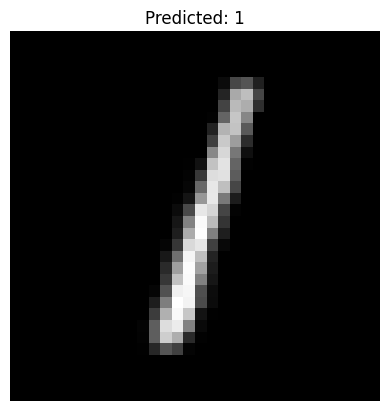

In [23]:
import numpy as np

# Ambil satu gambar dari test set
sample_image = x_test[2]  # Ambil gambar pertama
sample_image = np.expand_dims(sample_image, axis=0)  # Tambah batch dimensi

# Prediksi label
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(x_test[2], cmap="gray")
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()
